<a href="https://colab.research.google.com/github/3shadesblacker/Neural-networks/blob/main/Reseau_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install idx2numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=a4287cacbd233e90a18be5ec12bab3031bf5e141fc6e67ac83327e3633c0bb26
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


* Import statements

In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import idx2numpy
import matplotlib.pyplot as mp

* Sets creation

In [8]:
X_train = idx2numpy.convert_from_file('drive/MyDrive/Colab Notebooks/train-images.idx3-ubyte').reshape((-1, 1, 28, 28))
y_train = idx2numpy.convert_from_file('drive/MyDrive/Colab Notebooks/train-labels.idx1-ubyte')
x_test = idx2numpy.convert_from_file('drive/MyDrive/Colab Notebooks/t10k-images.idx3-ubyte').reshape((-1, 1, 28, 28))
y_test = idx2numpy.convert_from_file('drive/MyDrive/Colab Notebooks/t10k-labels.idx1-ubyte')

* Model creation

In [12]:
model = keras.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(1, 28, 28)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

* Compilation and result

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.0681 - accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0673 - accuracy: 0.9826
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0601 - accuracy: 0.9841
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0703 - accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0574 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0684 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0627 - accuracy: 0.9843
Epoch 8/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0556 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0645 - accuracy: 0.9845
Epoch 10/10
1875/1875 [==============================] - 36s 19m

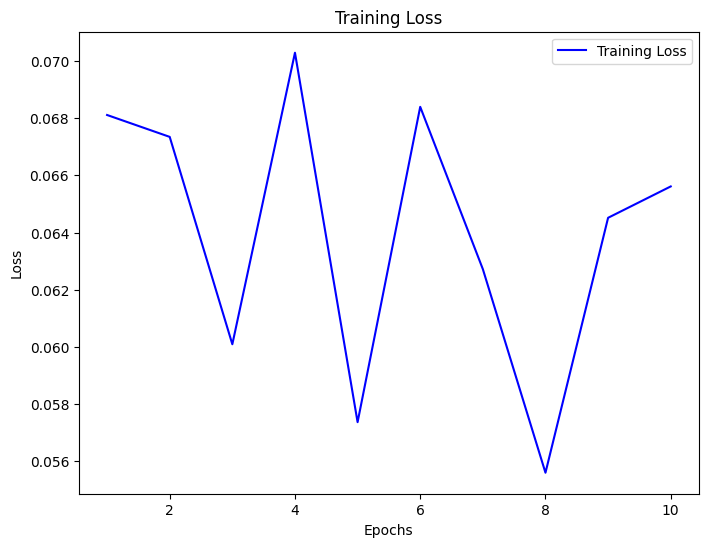

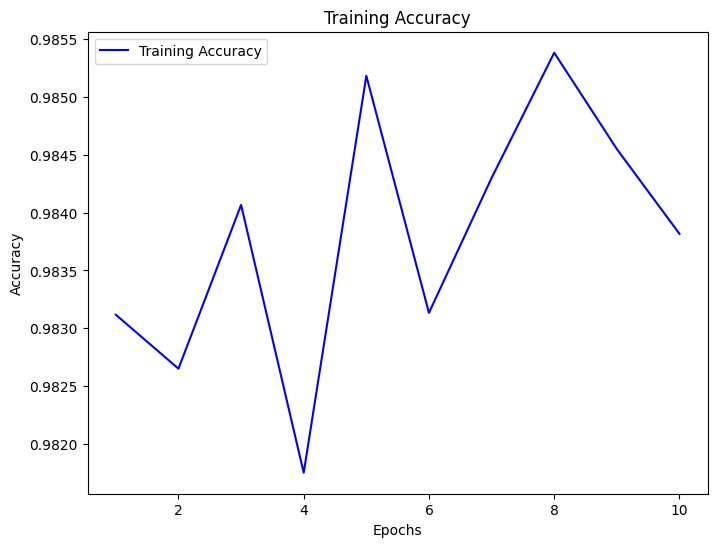

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

mp.figure(figsize=(8, 6))
mp.plot(range(1, len(training_loss) + 1), training_loss, 'b-', label='Training Loss')
mp.xlabel('Epochs')
mp.ylabel('Loss')
mp.title('Training Loss')
mp.legend()
mp.show()

mp.figure(figsize=(8, 6))
mp.plot(range(1, len(training_accuracy) + 1), training_accuracy, 'b-', label='Training Accuracy')
mp.xlabel('Epochs')
mp.ylabel('Accuracy')
mp.title('Training Accuracy')
mp.legend()
mp.show()